<a href="https://colab.research.google.com/github/KarabiMandal185/Assignment-aiml-1/blob/main/2303A51620_AIML_LABEXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# For binary classification, let's only use two classes (e.g., class 0 and class 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
weather = pd.read_csv('/content/weather_forecast_data.csv')

In [23]:
# Initialize and train the SVM model with a linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

# Predict the test set results
y_pred_linear = linear_svm.predict(X_test)

# Evaluate the performance using accuracy and confusion matrix
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

print(f"Accuracy (Linear Kernel): {accuracy_linear}")
print("Confusion Matrix (Linear Kernel):")
print(conf_matrix_linear)


Accuracy (Linear Kernel): 1.0
Confusion Matrix (Linear Kernel):
[[13  0]
 [ 0 13]]


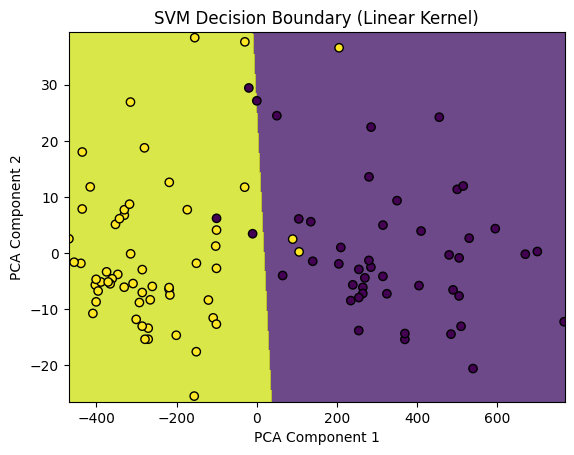

In [24]:
from sklearn.decomposition import PCA

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM with reduced dimensions
linear_svm_pca = SVC(kernel='linear')
linear_svm_pca.fit(X_train_pca, y_train)

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary (Linear Kernel)')
    plt.show()

plot_decision_boundary(linear_svm_pca, X_train_pca, y_train)


In [25]:
# Initialize and train the SVM model with a non-linear (RBF) kernel
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

# Predict the test set results
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluate the performance using accuracy and confusion matrix
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
print("Confusion Matrix (RBF Kernel):")
print(conf_matrix_rbf)


Accuracy (RBF Kernel): 0.8846153846153846
Confusion Matrix (RBF Kernel):
[[11  2]
 [ 1 12]]


In [26]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate SVM with scaled features
linear_svm_scaled = SVC(kernel='linear')
linear_svm_scaled.fit(X_train_scaled, y_train)
y_pred_linear_scaled = linear_svm_scaled.predict(X_test_scaled)
accuracy_linear_scaled = accuracy_score(y_test, y_pred_linear_scaled)
conf_matrix_linear_scaled = confusion_matrix(y_test, y_pred_linear_scaled)

print(f"Accuracy (Linear Kernel with Scaling): {accuracy_linear_scaled}")
print("Confusion Matrix (Linear Kernel with Scaling):")
print(conf_matrix_linear_scaled)

rbf_svm_scaled = SVC(kernel='rbf')
rbf_svm_scaled.fit(X_train_scaled, y_train)
y_pred_rbf_scaled = rbf_svm_scaled.predict(X_test_scaled)
accuracy_rbf_scaled = accuracy_score(y_test, y_pred_rbf_scaled)
conf_matrix_rbf_scaled = confusion_matrix(y_test, y_pred_rbf_scaled)

print(f"Accuracy (RBF Kernel with Scaling): {accuracy_rbf_scaled}")
print("Confusion Matrix (RBF Kernel with Scaling):")
print(conf_matrix_rbf_scaled)


Accuracy (Linear Kernel with Scaling): 1.0
Confusion Matrix (Linear Kernel with Scaling):
[[13  0]
 [ 0 13]]
Accuracy (RBF Kernel with Scaling): 1.0
Confusion Matrix (RBF Kernel with Scaling):
[[13  0]
 [ 0 13]]
